In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Load datasets
data1=pd.read_csv("Downloads/historical_data.csv")
data1.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [48]:
data2=pd.read_csv("Downloads/fear_greed_index.csv")
data2.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [49]:
# The 'date' column in data2 is a string (e.g.'2018-02-01'). converting to datetime.
data2['Date']=pd.to_datetime(data2['date'])

In [50]:
# The trade data has 'Timestamp IST' (e.g., '02-12-2024 22:50').
# I am setting dayfirst=True because standard IST format usually puts the day first.
# I'm also normalizing it (removing the time) because the sentiment data is only daily.
data1['Date_Time']=pd.to_datetime(data1['Timestamp IST'],dayfirst=True)
data1['Date']=data1['Date_Time'].dt.normalize()

In [51]:
# Now I join the data1 with the data2 of that specific day.
# 'inner' join ensures we only analyze data1 where we have data2 data.
df=pd.merge(data1,data2,on='Date',how='inner')
print(f"Merged Data Shape:{df.shape}")

Merged Data Shape: (211218, 22)


In [53]:
# My hypothesis: Traders might be more emotional (and less profitable) during 'Extreme Fear'.

# Group by data2 Classification and calculate stats
analysis = df.groupby('classification').agg({
    'Closed PnL': ['sum', 'mean', 'count'],  # Total Profit, Avg Profit, and Volume
    'Size USD': 'mean'                       # Avg Position Size
}).reset_index()

In [54]:
# Rename columns to make it look cleaner
analysis.columns = ['Sentiment', 'Total PnL', 'Avg PnL per Trade', 'Trade Count', 'Avg Position Size']

In [57]:
# Sort by Avg PnL to see which is most profitable
analysis = analysis.sort_values(by='Avg PnL per Trade', ascending=False)
print("\nInsight: Performance by Market Sentiment")
print(analysis)


Insight: Performance by Market Sentiment
       Sentiment     Total PnL  Avg PnL per Trade  Trade Count  \
1  Extreme Greed  2.715171e+06          67.892861        39992   
2           Fear  3.357155e+06          54.290400        61837   
3          Greed  2.150129e+06          42.743559        50303   
0   Extreme Fear  7.391102e+05          34.537862        21400   
4        Neutral  1.292921e+06          34.307718        37686   

   Avg Position Size  
1        3112.251565  
2        7816.109931  
3        5736.884375  
0        5349.731843  
4        4782.732661  


C:\Users\user\AppData\Local\Temp\ipykernel_3800\2600881794.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=analysis, x='Sentiment', y='Avg PnL per Trade',palette='viridis')


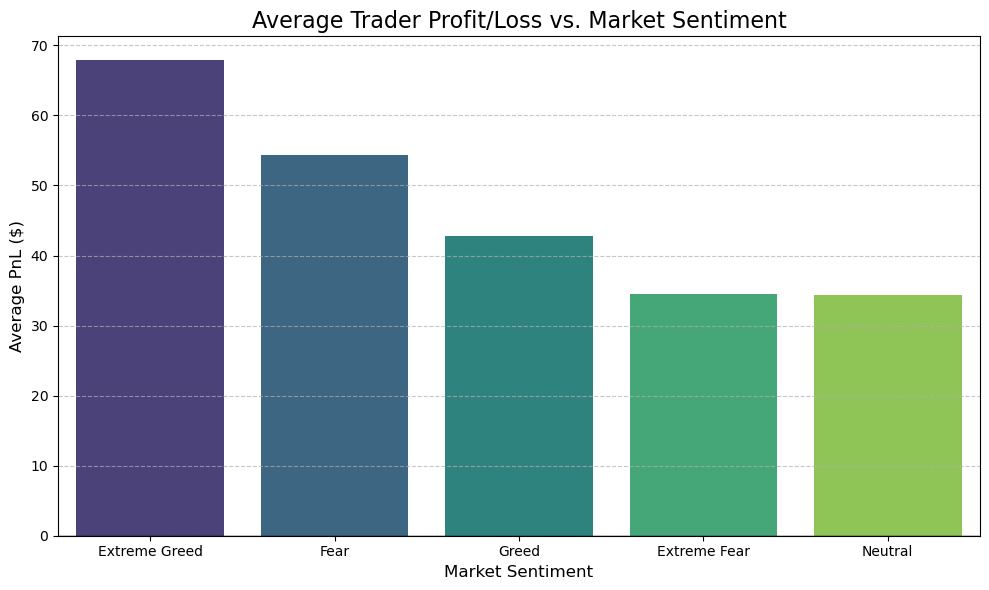

In [58]:
# Visualizing the results to make the insights pop out

plt.figure(figsize=(10, 6))

# I'm using a bar plot to show the Average PnL per trade for each sentiment.
sns.barplot(data=analysis, x='Sentiment', y='Avg PnL per Trade',palette='viridis')

plt.title('Average Trader Profit/Loss vs. Market Sentiment',fontsize=16)
plt.ylabel('Average PnL ($)',fontsize=12)
plt.xlabel('Market Sentiment',fontsize=12)
plt.axhline(0, color='black',linewidth=1) # Add a line at 0 to show break-even clearly
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()